## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [10]:
import pandas as pd
from scipy import stats
from scipy.stats import mstats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [11]:
df = pd.read_csv('data/human_body_temperature.csv')

In [12]:
k2,p = scipy.stats.mstats.normaltest(df.temperature)
p

0.2587479863488254

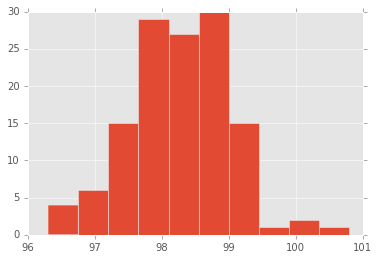

In [13]:
df.temperature.hist()

## Question 1
From the histogram plot above the distribution of temperature is apporximately normal.

Also the p-value from normality test is 0.25 which means the null hypothesis that the data is from a normal distribution cannot be rejected.

In [14]:
len(df)

130

In [24]:
t,prob = stats.ttest_1samp(df.temperature,98.6)
prob

2.4106320415561276e-07

## Question 2
Since the p-value is really small we reject the null hypothesis that the sample mean is equal to the population mean of 98.6.

Since the number of samples is 130 which is much bigger than 30 there will not be any significant difference between the results.

In [41]:
 s = (df.temperature.std()/(130 ** 0.5))
se = 2.58 * s
se

0.1659053954417588

In [42]:
mu = df.temperature.mean()
mu 

98.24923076923078

In [43]:
(mu-se,mu + se)

(98.08332537378902, 98.41513616467253)

## Question 3
99% confidence interval for temperature is (98.08,98.41). Temperature beyond this interval should be considered abnormal.

In [52]:
tempM = df[df.gender=='M'].temperature
tempF = df[df.gender=='F'].temperature
t,prob = stats.ttest_ind(tempM,tempF)
prob

0.023931883122395609

## Question 4
Since the p-value is 0.02 we cannot reject the null hypothesis that there is no difference between the two sample means.